# 반드시 처음부터 끝까지 스켈레톤 코드를 살펴보고 구현하기 시작하길 바란다

## 1. 스켈레톤 코드를 [복사 및 편집] 하여 사용한다.
## 2. 아래의 [Empty Module 3개]를 직접 구현한다.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2021-ml-tp2-spam/train.csv
/kaggle/input/2021-ml-tp2-spam/test.csv
/kaggle/input/2021-ml-tp2-spam/sample_submit.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

- nltk 라이브러리에서 punkt 데이터를 다운 받음, 이 데이터는 영화 리뷰와 같은 문서 데이터로 문자의 tokeninizer를 위해서 필요하다
- nltk 라이브러리를 이용해서 불용어를 다운 받음

In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
df_train = pd.read_csv("/kaggle/input/2021-ml-tp2-spam/train.csv",encoding="latin-1")
df_test = pd.read_csv("/kaggle/input/2021-ml-tp2-spam/test.csv",encoding="latin-1")
df_train.head()

,Data,Class
0,No I'm in the same boat. Still here at my moms...,ham
1,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...,spam
2,They r giving a second chance to rahul dengra.,ham
3,O i played smash bros &lt;#&gt; religiously.,ham
4,PRIVATE! Your 2003 Account Statement for 07973...,spam


In [5]:
X_train = df_train["Data"]
y_train=df_train["Class"]
X_test=df_test["Data"]

# [Empty Module #1] 텍스트 데이터 전처리  

목표: 텍스트 데이터를 처리하기 위한 여러 과정을 거쳐, 머신을 위한 데이터를 만든다. 

```
[input]
--------------
- text: 텍스트 문장 데이터 

[output]
--------------
- text: 전처리를 완료한 문장 데이터 
    
```

In [6]:
# ------------------------------------------------
# [Empty Module #1] 텍스트 데이터 전처리
# ------------------------------------------------
# ------------------------------------------------------------
# 구현 가이드라인 
# ------------------------------------------------------------
# [1] re.sub 사용해 text 속 '[^A-Za-z]' 외의 문자만을 찾아내 제거한후, pre_words 변수에 저장
#      1) pattern은 '[^A-Za-z]', repl=' ' 로 각각 설정.
#      2) 이모지나 숫자,점과 같은 문자외의 것들을 제거했다. (이모지는 감정 분석과 관련해서 몇가지 의미를 나타내지만 이 테스크에서는 이러한 의미도 제거함.)

# [2] pre_words의 lower 내장 함수를 이용해 대문자들은 소문자로 변경
#      1)  대, 소문자가 구분되어 있으면 "Go"와 "go" 와 같이 동일한 단어를 머신은 다른 단어로 취급한다. 따라서 대문자를 모두 소문자로 변경.

# [3] word_tokenize 함수를 이용해 pre_word 를 토큰화하여 word를 리스트화한 후 tokenized_words변수에 저장

# [4] nltk 라이브러리로 다운 받은 stopwords의 "words" 내장 함수를 이용해 english 불용어를 찾아서 stops 변수에 저장  
#      1) 불용어: 텍스트 분류에서 불용어는 텍스트의 중요도을 결정하는데 영향을 미치지 않는 단어임. 
#                    (ex: the, we, a , will), 따라서 불필요한 단어가 예측 모델에 악영향을 끼칠 수 있기 때문에 제거.

# [5] [3] 에서 찾은 문자열 중 단어가 [4] 에서 찾은 불용어 속에 없을 경우, tokenized_words_remove 리스트에 append 

# [6] PorterStemmer 속 stem 내장 함수를 이용해 동일 의미를 갖는 단어를 동일한 단어로 변경하는 과정을 거친 후 다시 저장.
   
# ------------------------------------------------------------
# #############

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

def data_processing(text):
    # [1]
    pre_words = re.sub(pattern='[^A-Za-z]', repl=' ', string=text)
    ##############
   
    # [2]
    pre_words = pre_words.lower()
    ##############
    
    # [3]
    tokenized_words = word_tokenize(pre_words)
    ##############
    
    # [4]
    stops = stopwords.words('english')
    
    ##############
    tokenized_words_remove=[]
    
    for w in tokenized_words: 
        # [5]
        if w not in stops:
            tokenized_words_remove.append(w)
        ##############
    
    stemmer = PorterStemmer()
    for i in range(len(tokenized_words_remove)):
        # [6]
        tokenized_words_remove[i] = \
            stemmer.stem(tokenized_words_remove[i])
        ##############
    
    return ( " ".join( tokenized_words_remove ))

In [7]:
X_train=[data_processing(i) for i in X_train]
X_test=[data_processing(i) for i in X_test]

# [Empty Module #2] Bag of Word 

목표: 문장 데이터를 머신을 학습하기 위한 실수화된 Feature로 변경하기로한다. 

- train 과 test 데이터 전부 type을 ('U')로 변경하여 Countvectorizer를 사용한다. 
- [설명 링크](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html?highlight=countvectorizer#sklearn.feature_extraction.text.CountVectorizer)

[HashingVectorizer vs CountVectorizer](https://kavita-ganesan.com/hashingvectorizer-vs-countvectorizer/#.YLCjCS-UF8I)

In [8]:
# ------------------------------------------------
# [Empty Module #2] 텍스트 데이터 Bag of word  feature  화 
# ------------------------------------------------
# 구현 가이드라인 
# ------------------------------------------------------------
# [1]  CountVectorizer를 정의 
#           1) max_features를 100으로 지정 
# [2] X_train 과 X_test를 numpy array로 변환 후 데이터 타입을 "U"로 변경해 저장

# [3] CountVectorizer를 이용해 X_train은 학습 및 변환을 하고, X_test는 변환을 진행. 
# ------------------------------------------------------------
###########

# [1]
count_vectorizer = CountVectorizer(max_features=100)
tfidf_vectorizer = TfidfVectorizer(max_features=100)
hash_vectorizer = HashingVectorizer(n_features=100)

# [2]
X_train = np.array(X_train).astype('U')
X_test = np.array(X_test).astype('U')

# [3]
count_vectorizer.fit(X_train)
tfidf_vectorizer.fit(X_train)
hash_vectorizer.fit(X_train)

X_train_count = count_vectorizer.transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

X_train_hash = hash_vectorizer.transform(X_train)
X_test_hash = hash_vectorizer.transform(X_test)

In [9]:
X_train_count.shape

(4457, 100)

In [10]:
X_train_tfidf.shape

(4457, 100)

In [11]:
X_train_hash.shape

(4457, 100)

In [12]:
y_train[y_train=="ham"]=0
y_train[y_train=="spam"]=1
y_train=y_train.astype("uint8")

## [Empty Module #3] SVM: classifier

목표: SVC() 를 활용해 classification 을 진행

- fit()으로 train 에 대한 머신러닝 학습
- predict()으로 test 에 대한 정답을 추론 하여 반환

In [13]:
def print_cv_results(cv_results):
    for score_type in ['train_score', 'test_score']:
        print(f"{score_type}: {cv_results[score_type]}")
        
    print(f"mean train_score: {np.mean(cv_results['train_score'])}")
    print(f"mean test_score: {np.mean(cv_results['test_score'])}")

In [14]:
# ------------------------------------------------
# [Empty Module #3] 텍스트 데이터 Bag of word  feature  화 
# ------------------------------------------------------------
# 구현 가이드라인 
# ------------------------------------------------------------
# [1]  SVC 정의 
#           1) gamma="auto" 사용 
# [2] X_train_features과 y_train으로 SVC 학습진행 후, X_test_features로 predict 진행

# ------------------------------------------------------------
###########

data_by_vect = [['hash', X_train_hash, X_test_hash],
                ['count', X_train_count, X_test_count],
                ['tfidf', X_train_tfidf, X_test_tfidf]]

for vect_type, train_data, test_data in data_by_vect:
    # [1]
    svc = SVC(gamma='auto')
    svc.fit(train_data, y_train)
    
    # [2]
    y_pred = svc.predict(test_data)
    
    # cross validate
    cv_results = cross_validate(svc, train_data, y_train,
                                return_train_score=True)
    print(f"<<< {vect_type} >>>")
    print_cv_results(cv_results)
    
    
    # Predict to CSV
    df_pred={"ID": range(np.array(y_pred).shape[0]),"Class":y_pred}
    df_pred=pd.DataFrame(df_pred)
    df_pred.to_csv(f"predict_{vect_type}.csv", index=False)

<<< hash >>>
train_score: [0.86619916 0.86619916 0.86595625 0.86595625 0.86595625]
test_score: [0.86547085 0.86547085 0.8664422  0.8664422  0.8664422 ]
mean train_score: 0.8660534154973062
mean test_score: 0.8660536606724948
<<< count >>>
train_score: [0.94614306 0.94726508 0.94727987 0.95092541 0.94896242]
test_score: [0.94955157 0.95964126 0.94276094 0.93602694 0.94388328]
mean train_score: 0.9481151659077197
mean test_score: 0.9463727962233193
<<< tfidf >>>
train_score: [0.87769986 0.87489481 0.87352776 0.87941671 0.87941671]
test_score: [0.87668161 0.87668161 0.87429854 0.87205387 0.87654321]
mean train_score: 0.8769911718828046
mean test_score: 0.875251770319035


# Predict to CSV
```python
df_pred={"ID": range(np.array(y_pred).shape[0]),"Class":y_pred}
df_pred=pd.DataFrame(df_pred)
df_pred.to_csv("predict.csv",index=False)
```

## Explore Data

In [15]:
# train data 내에 spam 문자 비율 - 불균형 데이터
# - class_weight, oversampling 적용해보기
np.sum(y_train == 1)/len(y_train) * 100

13.394660085259144

In [16]:
for i, text in enumerate(df_train[df_train['Class'] == 1]['Data'].iloc[:20]):
    print(f"{i}: {text}")

0: (Bank of Granite issues Strong-Buy) EXPLOSIVE PICK FOR OUR MEMBERS *****UP OVER 300% *********** Nasdaq Symbol CDGT That is a $5.00 per..
1: PRIVATE! Your 2003 Account Statement for 07973788240 shows 800 un-redeemed S. I. M. points. Call 08715203649 Identifier Code: 40533 Expires 31/10/04
2: 88066 FROM 88066 LOST 3POUND HELP
3: Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed Ã¥Â£1000 cash or Ã¥Â£5000 prize!
4: Not heard from U4 a while. Call me now am here all night with just my knickers on. Make me beg for it like U did last time 01223585236 XX Luv Nikiyu4.net
5: PRIVATE! Your 2004 Account Statement for 07742676969 shows 786 unredeemed Bonus Points. To claim call 08719180248 Identifier Code: 45239 Expires
6: FROM 88066 LOST Ã¥Â£12 HELP
7: Buy Space Invaders 4 a chance 2 win orig Arcade Game console. Press 0 for Games Arcade (std WAP charge) See o2.co.uk/games 4 Terms + settings. No purchase
8: URGENT, IMPORTAN

In [17]:
for i, text in enumerate(df_train[df_train['Class'] == 0]['Data'].iloc[:20]):
    print(f"{i}: {text}")

0: No I'm in the same boat. Still here at my moms. Check me out on yo. I'm half naked.
1: They r giving a second chance to rahul dengra.
2: O i played smash bros  &lt;#&gt;  religiously.
3: G says you never answer your texts, confirm/deny
4: Okey dokey, iÂÃÃ·ll be over in a bit just sorting some stuff out.
5: Why i come in between you people
6: Wah lucky man... Then can save money... Hee...
7: Much better now thanks lol
8: Madam,regret disturbance.might receive a reference check from DLF Premarica.kindly be informed.Rgds,Rakhesh,Kerala.
9: I'm coming home 4 dinner.
10: Ok...
11: Can Ã_ all decide faster cos my sis going home liao..
12: Hi mate its RV did u hav a nice hol just a message 3 say hello coz havenÃ¥Ãt sent u 1 in ages started driving so stay off roads!RVx
13: Amazing : If you rearrange these letters it gives the same meaning... Dormitory = Dirty room Astronomer = Moon starer The eyes = They see Election results = Lies lets recount Mother-in-law = Woman Hitler Eleven plus 

In [18]:
for i, text in enumerate(X_train[y_train == 1][:20]):
    print(f"{i}: {text}")

0: bank granit issu strong buy explos pick member nasdaq symbol cdgt per
1: privat account statement show un redeem point call identifi code expir
2: lost pound help
3: pleas call custom servic repres freephon pm guarante cash prize
4: heard u call night knicker make beg like u last time xx luv nikiyu net
5: privat account statement show unredeem bonu point claim call identifi code expir
6: lost help
7: buy space invad chanc win orig arcad game consol press game arcad std wap charg see co uk game term set purchas
8: urgent import inform user today lucki day find log onto http www urawinn com fantast surpris await
9: polyphon tone ur mob everi week txt pt st tone free get txtin tell ur friend p tone repli hl info
10: winner valu network custom select receivea prize reward claim call claim code kl valid hour
11: gsoh good spam ladi u could b male gigolo join uk fastest grow men club repli oncal mjzgroup stop repli stop msg rcvd
12: free msg get gnarl barkley crazi rington total free repl

In [19]:
for i, text in enumerate(X_train[y_train == 0][:20]):
    print(f"{i}: {text}")

0: boat still mom check yo half nake
1: r give second chanc rahul dengra
2: play smash bro lt gt religi
3: g say never answer text confirm deni
4: okey dokey bit sort stuff
5: come peopl
6: wah lucki man save money hee
7: much better thank lol
8: madam regret disturb might receiv refer check dlf premarica kindli inform rgd rakhesh kerala
9: come home dinner
10: ok
11: decid faster co si go home liao
12: hi mate rv u hav nice hol messag say hello coz sent u age start drive stay road rvx
13: amaz rearrang letter give mean dormitori dirti room astronom moon starer eye see elect result lie let recount mother law woman hitler eleven plu two twelv plu one amaz
14: good morn plz call sir
15: k actual guy meet sunoco howard right way
16: new theori argument win situat lose person dont argu ur friend kick amp say alway correct
17: oh yeah diet flew window
18: watch cartoon listen music amp eve go templ amp church u
19: india win level seri mean record


In [20]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words

corpus = get_corpus(df_train['Data'])

from collections import Counter

counter = Counter(corpus)
most_common = counter.most_common(40)
most_common = dict(most_common)
most_common

{'to': 1739,
 'you': 1247,
 'I': 1185,
 'a': 1067,
 'the': 944,
 'and': 667,
 'in': 633,
 'is': 620,
 'i': 589,
 'u': 566,
 'for': 523,
 'my': 491,
 'of': 465,
 'your': 459,
 'me': 432,
 'on': 383,
 'have': 379,
 '2': 362,
 'that': 324,
 'are': 309,
 'at': 298,
 'or': 296,
 'it': 293,
 'call': 293,
 'be': 271,
 'not': 271,
 'with': 265,
 'will': 262,
 'get': 257,
 'U': 256,
 'ur': 236,
 '&lt;#&gt;': 234,
 'so': 234,
 "I'm": 230,
 'can': 228,
 'but': 220,
 'You': 217,
 'from': 210,
 '4': 200,
 'up': 199}

In [21]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words

corpus = get_corpus(X_train)

from collections import Counter

counter = Counter(corpus)
most_common = counter.most_common(40)
most_common = dict(most_common)
most_common

{'u': 998,
 'call': 549,
 'go': 386,
 'get': 366,
 'ur': 320,
 'lt': 267,
 'gt': 267,
 'come': 245,
 'ok': 240,
 'free': 236,
 'day': 224,
 'know': 213,
 'got': 208,
 'love': 207,
 'time': 202,
 'good': 198,
 'like': 197,
 'want': 193,
 'text': 185,
 'send': 175,
 'txt': 166,
 'p': 151,
 'one': 147,
 'need': 147,
 'today': 144,
 'stop': 142,
 'see': 140,
 'home': 139,
 'n': 136,
 'r': 135,
 'repli': 133,
 'lor': 130,
 'take': 130,
 'still': 129,
 'sorri': 129,
 'mobil': 129,
 'k': 127,
 'think': 127,
 'back': 126,
 'da': 125}

In [22]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
# text 데이터의 길이
df_train['text_len'] = df_train['Data'].apply(len)
df_test['text_len'] = df_test['Data'].apply(len)
df_train.head()

,Data,Class,text_len
0,No I'm in the same boat. Still here at my moms...,0,83
1,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...,1,137
2,They r giving a second chance to rahul dengra.,0,46
3,O i played smash bros &lt;#&gt; religiously.,0,46
4,PRIVATE! Your 2003 Account Statement for 07973...,1,148


In [24]:
# scaling을 위해 text 길이에 log
df_train['log_text_len'] = df_train['text_len'].apply(np.log)
df_test['log_text_len'] = df_test['text_len'].apply(np.log)
df_train.head()

,Data,Class,text_len,log_text_len
0,No I'm in the same boat. Still here at my moms...,0,83,4.418841
1,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...,1,137,4.919981
2,They r giving a second chance to rahul dengra.,0,46,3.828641
3,O i played smash bros &lt;#&gt; religiously.,0,46,3.828641
4,PRIVATE! Your 2003 Account Statement for 07973...,1,148,4.997212


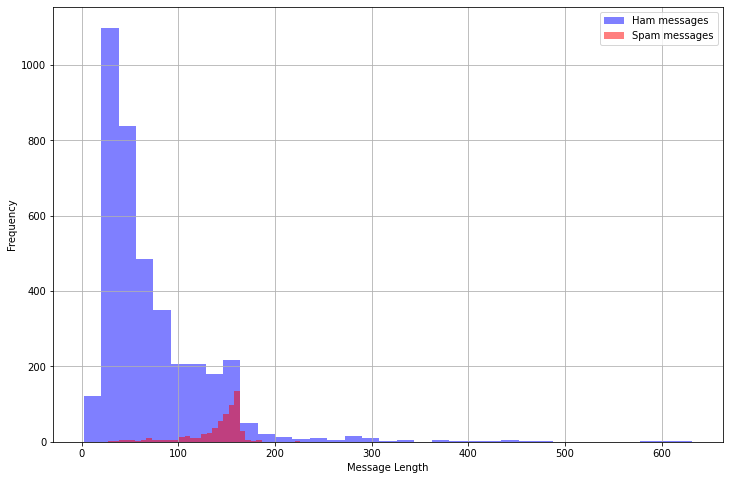

In [25]:
plt.figure(figsize=(12, 8))
df_train.loc[df_train['Class'] == 0, 'text_len'].plot(color='blue',
                                                      label='Ham messages',
                                                      alpha=0.5,
                                                      kind='hist', bins=35)
df_train.loc[df_train['Class'] == 1, 'text_len'].plot(color='red',
                                                      label='Spam messages',
                                                      alpha=0.5,
                                                      kind='hist', bins=35)
plt.legend()
plt.grid()
plt.xlabel("Message Length")
plt.show()

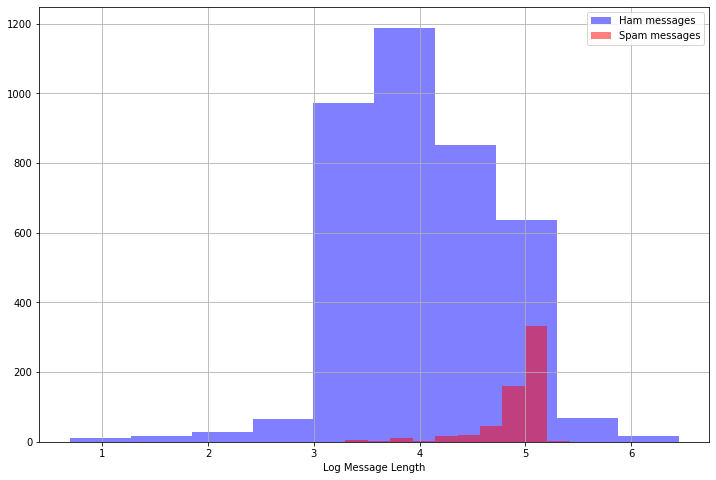

In [26]:
plt.figure(figsize=(12, 8))

plt.hist(np.log(df_train.loc[df_train['Class'] == 0, 'text_len']),
         color='blue', label='Ham messages', alpha=0.5)
plt.hist(np.log(df_train.loc[df_train['Class'] == 1, 'text_len']),
         color='red', label='Spam messages', alpha=0.5)
plt.legend()
plt.grid()
plt.xlabel("Log Message Length")
plt.show()

## Experiment 1
> 성능이 괜찮았다. 나중에 적용해보기.
- count_vectorized data 에 pca를 통한 차원 축소

In [27]:
pca = PCA(n_components=50, random_state=42)
pca.fit(X_train_count.toarray())

X_train_count_pca = pca.transform(X_train_count.toarray())
X_test_count_pca = pca.transform(X_test_count.toarray())

cv_results = cross_validate(SVC(gamma='auto'), 
                            X_train_count_pca, y_train,
                            return_train_score=True)
print_cv_results(cv_results)


train_score: [0.95147265 0.95175316 0.95344924 0.95541223 0.95260796]
test_score: [0.95515695 0.96188341 0.94837262 0.94388328 0.94725028]
mean train_score: 0.9529390479981185
mean test_score: 0.9513093063167801


In [28]:
X_train_count_pca.shape

(4457, 50)

In [29]:
# sparse matrix 는 StandardScaler에서 오류 발생
# 함수에 인자를 전달할 때 np.array로 전달
def plot_eigvalue(data):
    data_std = StandardScaler().fit_transform(data)
    scov = np.cov(data_std.T)
    eigen_vals, eigen_vecs = np.linalg.eig(scov)
    
    total = sum(eigen_vals)
    sum_eigval = 0
    var_exp = []
    for eig_val in sorted(eigen_vals, reverse=True):
        sum_eigval += eig_val
        var_exp.append(sum_eigval)
    plt.bar(range(data.shape[1]), var_exp)
    plt.ylabel('Sum of variance')
    plt.xlabel('Principal component')
    plt.show()

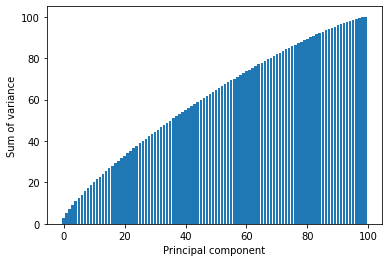

In [30]:
plot_eigvalue(X_train_count.toarray())

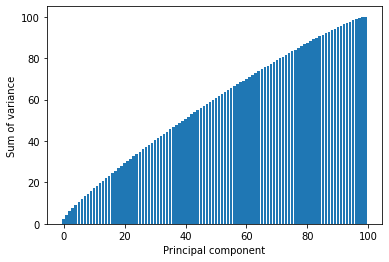

In [31]:
plot_eigvalue(X_train_tfidf.toarray())

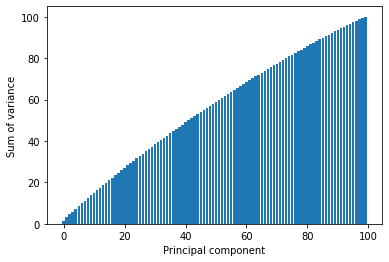

In [32]:
plot_eigvalue(X_train_hash.toarray())

## Experiment2 - parameter

```python
param_grid = {
    'kernel': ['rbf', 'sigmoid', 'linear', 'poly'],
    'C': [0.01, 0.1, 1, 10, 100, 1000, 2000],
    'class_weight': [None, 'balanced'],
}

gridsearch = GridSearchCV(SVC(gamma='auto'), param_grid)
gridsearch.fit(X_train_count, y_train)

print(f"best_score_: {gridsearch.best_score_}")
print(f"best_params_: {gridsearch.best_params_}")
```
> ```
best_score_: 0.9679143200817342
best_params_: {'C': 1000, 'class_weight': None, 'kernel': 'rbf'}
```

```python
param_grid = {
    'kernel': ['rbf', 'sigmoid', 'linear', 'poly'],
    'C': [0.01, 0.1, 1, 10, 100, 1000, 2000],
    'class_weight': [None, 'balanced'],
}

gridsearch = GridSearchCV(SVC(gamma='auto'), param_grid)
gridsearch.fit(X_train_hash, y_train)

print(f"best_score_: {gridsearch.best_score_}")
print(f"best_params_: {gridsearch.best_params_}")
```
> ```
best_score_: 0.9349312758879276
best_params_: {'C': 2000, 'class_weight': None, 'kernel': 'rbf'}
```

```python
param_grid = {
    'kernel': ['rbf', 'sigmoid', 'linear', 'poly'],
    'C': [0.01, 0.1, 1, 10, 100, 1000, 2000],
    'class_weight': [None, 'balanced'],
}

gridsearch = GridSearchCV(SVC(gamma='auto'), param_grid)
gridsearch.fit(X_train_tfidf, y_train)

print(f"best_score_: {gridsearch.best_score_}")
print(f"best_params_: {gridsearch.best_params_}")
```
> ```
best_score_: 0.9649980120084753
best_params_: {'C': 100, 'class_weight': None, 'kernel': 'rbf'}
```

```python
pipeline = Pipeline(
    [('pca', PCA(random_state=42)),
     ('svc', SVC(gamma='auto'))]
)

param_grid = {
    'pca__n_components': [50, 60, 70, 80],
    'svc__kernel': ['rbf', 'sigmoid', 'linear', 'poly'],
    'svc__C': [0.01, 0.1, 1, 10, 100, 1000, 2000],
    'svc__class_weight': [None, 'balanced'],
}

gridsearch = GridSearchCV(pipeline, param_grid)
gridsearch.fit(X_train_count.toarray(), y_train)

print(f"best_score_: {gridsearch.best_score_}")
print(f"best_params_: {gridsearch.best_params_}")
```
> ```
best_score_: 0.969484581741682
best_params_: {'pca__n_components': 80, 'svc__C': 1000, 'svc__class_weight': None, 'svc__kernel': 'rbf'}
```

```python
pipeline = Pipeline(
    [('pca', PCA(random_state=42)),
     ('svc', SVC(gamma='auto'))]
)

param_grid = {
    'pca__n_components': [50, 60, 70, 80],
    'svc__kernel': ['rbf', 'sigmoid', 'linear', 'poly'],
    'svc__C': [0.01, 0.1, 1, 10, 100, 1000, 2000],
    'svc__class_weight': [None, 'balanced'],
}

gridsearch = GridSearchCV(pipeline, param_grid)
gridsearch.fit(X_train_hash.toarray(), y_train)

print(f"best_score_: {gridsearch.best_score_}")
print(f"best_params_: {gridsearch.best_params_}")
```
> ```
best_score_: 0.9414372927078457
best_params_: {'pca__n_components': 80, 'svc__C': 2000, 'svc__class_weight': None, 'svc__kernel': 'rbf'}
```

```python
pipeline = Pipeline(
    [('pca', PCA(random_state=42)),
     ('svc', SVC(gamma='auto'))]
)

param_grid = {
    'pca__n_components': [50, 60, 70, 80],
    'svc__kernel': ['rbf', 'sigmoid', 'linear', 'poly'],
    'svc__C': [0.01, 0.1, 1, 10, 100, 1000, 2000],
    'svc__class_weight': [None, 'balanced'],
}

gridsearch = GridSearchCV(pipeline, param_grid)
gridsearch.fit(X_train_tfidf.toarray(), y_train)

print(f"best_score_: {gridsearch.best_score_}")
print(f"best_params_: {gridsearch.best_params_}")
```
> ```
best_score_: 0.9640996411549475
best_params_: {'pca__n_components': 70, 'svc__C': 2000, 'svc__class_weight': None, 'svc__kernel': 'rbf'}
```

### test submission

In [33]:
# 0.96143
svc = SVC(gamma='auto')

params = {
    'kernel': 'rbf',
    'C': 1000
}

svc.set_params(**params)
svc.fit(X_train_count, y_train)

y_pred = svc.predict(X_test_count)

df_pred={"ID": range(np.array(y_pred).shape[0]),"Class":y_pred}
df_pred=pd.DataFrame(df_pred)
df_pred.to_csv(f"predict_count_{params}.csv",index=False)

In [34]:
# 0.95695
svc = SVC(gamma='auto')

params = {
    'kernel': 'rbf',
    'C': 100
}

svc.set_params(**params)
svc.fit(X_train_tfidf, y_train)

y_pred = svc.predict(X_test_tfidf)

df_pred={"ID": range(np.array(y_pred).shape[0]),"Class":y_pred}
df_pred=pd.DataFrame(df_pred)
df_pred.to_csv(f"predict_tfidf_{params}.csv",index=False)

In [35]:
# 0.95964
pipeline = Pipeline(
    [('pca', PCA(random_state=42)),
     ('svc', SVC(gamma='auto'))]
)

params = {
    'pca__n_components': 80,
    'svc__kernel': 'rbf',
    'svc__C': 1000
}

pipeline.set_params(**params)
pipeline.fit(X_train_count.toarray(), y_train)

y_pred = pipeline.predict(X_test_count.toarray())

df_pred={"ID": range(np.array(y_pred).shape[0]),"Class":y_pred}
df_pred=pd.DataFrame(df_pred)
df_pred.to_csv(f"predict_count_pca_{params}.csv",index=False)

In [36]:
# 0.95964
pipeline = Pipeline(
    [('pca', PCA(random_state=42)),
     ('svc', SVC(gamma='auto'))]
)

params = {
    'pca__n_components': 70,
    'svc__kernel': 'rbf',
    'svc__C': 2000
}

pipeline.set_params(**params)
pipeline.fit(X_train_tfidf.toarray(), y_train)

y_pred = pipeline.predict(X_test_tfidf.toarray())

df_pred={"ID": range(np.array(y_pred).shape[0]),"Class":y_pred}
df_pred=pd.DataFrame(df_pred)
df_pred.to_csv(f"predict_tfidf_pca_{params}.csv",index=False)

## Experiment 3 - over sampling
> 

In [37]:
from imblearn.over_sampling import ADASYN

ada = ADASYN(random_state=42)
X_train_count_res, y_train_res = ada.fit_resample(X_train_count, y_train)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000, 2000],
}

gridsearch = GridSearchCV(SVC(gamma='auto'), param_grid)
gridsearch.fit(X_train_count_res, y_train_res)

print(f"best_score_: {gridsearch.best_score_}")
print(f"best_params_: {gridsearch.best_params_}")

best_score_: 0.8404386386842526
best_params_: {'C': 100}


In [38]:
from imblearn.over_sampling import ADASYN

ada = ADASYN(random_state=42)
X_train_tfidf_res, y_train_res = ada.fit_resample(X_train_tfidf, y_train)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000, 2000],
}

gridsearch = GridSearchCV(SVC(gamma='auto'), param_grid)
gridsearch.fit(X_train_tfidf_res, y_train_res)

print(f"best_score_: {gridsearch.best_score_}")
print(f"best_params_: {gridsearch.best_params_}")

best_score_: 0.8899405078352446
best_params_: {'C': 2000}


## Experiment4 - preprocessing

In [39]:
X_train_exp = df_train["Data"]
X_test_exp = df_test["Data"]

In [40]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

def data_processing_exp(text):
    pre_words = re.sub(pattern='[^A-Za-z]', repl=' ', string=text)
    pre_words = pre_words.lower()
    tokenized_words = word_tokenize(pre_words)
    stops = stopwords.words('english')
    
    tokenized_words_remove=[]
    for w in tokenized_words: 
        # 단어 길이가 1보다 큰 것만 저장
        if w not in stops and len(w) > 1:
            tokenized_words_remove.append(w)
    
    stemmer = PorterStemmer()
    for i in range(len(tokenized_words_remove)):
        tokenized_words_remove[i] = \
            stemmer.stem(tokenized_words_remove[i])
    
    return ( " ".join( tokenized_words_remove ))

In [41]:
X_train_exp = [data_processing_exp(i) for i in X_train_exp]
X_test_exp = [data_processing_exp(i) for i in X_test_exp]

In [42]:
# [1]
count_vectorizer = CountVectorizer(max_features=100)
tfidf_vectorizer = TfidfVectorizer(max_features=100)
hash_vectorizer = HashingVectorizer(n_features=100)

# [2]
X_train_exp = np.array(X_train_exp).astype('U')
X_test_exp = np.array(X_test_exp).astype('U')

# [3]
count_vectorizer.fit(X_train_exp)
tfidf_vectorizer.fit(X_train_exp)
hash_vectorizer.fit(X_train_exp)

X_train_exp_count = count_vectorizer.transform(X_train_exp)
X_test_exp_count = count_vectorizer.transform(X_test_exp)

X_train_exp_tfidf = tfidf_vectorizer.transform(X_train_exp)
X_test_exp_tfidf = tfidf_vectorizer.transform(X_test_exp)

X_train_exp_hash = hash_vectorizer.transform(X_train_exp)
X_test_exp_hash = hash_vectorizer.transform(X_test_exp)

In [43]:
param_grid = {
    'kernel': ['rbf', 'sigmoid'],
    'C': [0.01, 0.1, 1, 10, 100, 1000, 2000],
    'class_weight': [None, 'balanced'],
}

gridsearch = GridSearchCV(SVC(gamma='auto'), param_grid)
gridsearch.fit(X_train_exp_count, y_train)

print(f"best_score_: {gridsearch.best_score_}")
print(f"best_params_: {gridsearch.best_params_}")

best_score_: 0.9679143200817342
best_params_: {'C': 1000, 'class_weight': None, 'kernel': 'rbf'}


In [44]:
# 0.96143
svc = SVC(gamma='auto')

params = {
    'C': 1000
}

svc.set_params(**params)
svc.fit(X_train_exp_count, y_train)

y_pred = svc.predict(X_test_exp_count)

df_pred={"ID": range(np.array(y_pred).shape[0]),"Class":y_pred}
df_pred=pd.DataFrame(df_pred)
df_pred.to_csv(f"predict_exp4_count_{params}.csv",index=False)

In [45]:
param_grid = {
    'kernel': ['rbf', 'sigmoid'],
    'C': [0.01, 0.1, 1, 10, 100, 1000, 2000],
    'class_weight': [None, 'balanced'],
}

gridsearch = GridSearchCV(SVC(gamma='auto'), param_grid)
gridsearch.fit(X_train_exp_tfidf, y_train)

print(f"best_score_: {gridsearch.best_score_}")
print(f"best_params_: {gridsearch.best_params_}")

best_score_: 0.9649980120084753
best_params_: {'C': 100, 'class_weight': None, 'kernel': 'rbf'}


## Experiment5 - preprocessing

In [46]:
X_train_exp = df_train["Data"]
X_test_exp = df_test["Data"]

In [47]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

def data_processing_exp(text):
    pre_words = re.sub(pattern='[^A-Za-z]', repl=' ', string=text)
    pre_words = pre_words.lower()
    tokenized_words = word_tokenize(pre_words)
    stops = stopwords.words('english')
    # 'lt', 'gt' -> &lt; &gt; -> < >
    # &amp; 도 있는 것 같지만 그냥 둠... (16번 text)
    stops += ['ur', 'lt', 'gt']
    
    tokenized_words_remove=[]
    for w in tokenized_words: 
        # 단어 길이가 1보다 큰 것만 저장
        if w not in stops and len(w) > 1:
            tokenized_words_remove.append(w)
    
    stemmer = PorterStemmer()
    for i in range(len(tokenized_words_remove)):
        tokenized_words_remove[i] = \
            stemmer.stem(tokenized_words_remove[i])
    
    return ( " ".join( tokenized_words_remove ))

In [48]:
X_train_exp = [data_processing_exp(i) for i in X_train_exp]
X_test_exp = [data_processing_exp(i) for i in X_test_exp]

In [49]:
# [1]
count_vectorizer = CountVectorizer(max_features=100)
tfidf_vectorizer = TfidfVectorizer(max_features=100)
hash_vectorizer = HashingVectorizer(n_features=100)

# [2]
X_train_exp = np.array(X_train_exp).astype('U')
X_test_exp = np.array(X_test_exp).astype('U')

# [3]
count_vectorizer.fit(X_train_exp)
tfidf_vectorizer.fit(X_train_exp)
hash_vectorizer.fit(X_train_exp)

X_train_exp_count = count_vectorizer.transform(X_train_exp)
X_test_exp_count = count_vectorizer.transform(X_test_exp)

X_train_exp_tfidf = tfidf_vectorizer.transform(X_train_exp)
X_test_exp_tfidf = tfidf_vectorizer.transform(X_test_exp)

X_train_exp_hash = hash_vectorizer.transform(X_train_exp)
X_test_exp_hash = hash_vectorizer.transform(X_test_exp)

In [50]:
param_grid = {
    'kernel': ['rbf', 'sigmoid'],
    'C': [0.01, 0.1, 1, 10, 100, 1000, 2000],
    'class_weight': [None, 'balanced'],
}

gridsearch = GridSearchCV(SVC(gamma='auto'), param_grid)
gridsearch.fit(X_train_exp_count, y_train)

print(f"best_score_: {gridsearch.best_score_}")
print(f"best_params_: {gridsearch.best_params_}")

best_score_: 0.9683614923525237
best_params_: {'C': 1000, 'class_weight': None, 'kernel': 'rbf'}


In [51]:
svc = SVC(gamma='auto')

params = {
    'C': 1000
}

svc.set_params(**params)
svc.fit(X_train_exp_count, y_train)

y_pred = svc.predict(X_test_exp_count)

df_pred={"ID": range(np.array(y_pred).shape[0]),"Class":y_pred}
df_pred=pd.DataFrame(df_pred)
df_pred.to_csv(f"predict_exp5_count_{params}.csv",index=False)

In [52]:
param_grid = {
    'kernel': ['rbf', 'sigmoid'],
    'C': [0.01, 0.1, 1, 10, 100, 1000, 2000],
    'class_weight': [None, 'balanced'],
}

gridsearch = GridSearchCV(SVC(gamma='auto'), param_grid)
gridsearch.fit(X_train_exp_tfidf, y_train)

print(f"best_score_: {gridsearch.best_score_}")
print(f"best_params_: {gridsearch.best_params_}")

best_score_: 0.9647730418283482
best_params_: {'C': 2000, 'class_weight': None, 'kernel': 'rbf'}


## Experiment 6 - feature engineering

In [53]:
X_train_exp = df_train["Data"]
X_test_exp = df_test["Data"]

In [54]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

def data_processing_exp(text):
    pre_words = re.sub(pattern='[^A-Za-z]', repl=' ', string=text)
    pre_words = pre_words.lower()
    tokenized_words = word_tokenize(pre_words)
    stops = stopwords.words('english')
    # 'lt', 'gt' -> &lt; &gt; -> < >
    # &amp; 도 있는 것 같지만 그냥 둠... (16번 text)
    stops += ['ur', 'lt', 'gt']
    
    tokenized_words_remove=[]
    for w in tokenized_words: 
        # 단어 길이가 1보다 큰 것만 저장
        if w not in stops and len(w) > 1:
            tokenized_words_remove.append(w)
    
    stemmer = PorterStemmer()
    for i in range(len(tokenized_words_remove)):
        tokenized_words_remove[i] = \
            stemmer.stem(tokenized_words_remove[i])
    
    return ( " ".join( tokenized_words_remove ))

In [55]:
X_train_exp = [data_processing_exp(i) for i in X_train_exp]
X_test_exp = [data_processing_exp(i) for i in X_test_exp]

In [56]:
# [1]
count_vectorizer = CountVectorizer(max_features=100)
tfidf_vectorizer = TfidfVectorizer(max_features=100)

# [2]
X_train_exp = np.array(X_train_exp).astype('U')
X_test_exp = np.array(X_test_exp).astype('U')

# [3]
count_vectorizer.fit(X_train_exp)
tfidf_vectorizer.fit(X_train_exp)

X_train_exp_count = count_vectorizer.transform(X_train_exp)
X_test_exp_count = count_vectorizer.transform(X_test_exp)

X_train_exp_tfidf = tfidf_vectorizer.transform(X_train_exp)
X_test_exp_tfidf = tfidf_vectorizer.transform(X_test_exp)

In [57]:
X_train_exp_count = \
    np.concatenate((X_train_exp_count.toarray(),
                    df_train['log_text_len'].values.reshape(-1, 1)),
                   axis=1)
X_test_exp_count = \
    np.concatenate((X_test_exp_count.toarray(),
                    df_test['log_text_len'].values.reshape(-1, 1)),
                   axis=1)

In [58]:
X_train_exp_tfidf = \
    np.concatenate((X_train_exp_tfidf.toarray(),
                    df_train['log_text_len'].values.reshape(-1, 1)),
                   axis=1)
X_test_exp_tfidf = \
    np.concatenate((X_test_exp_tfidf.toarray(),
                    df_test['log_text_len'].values.reshape(-1, 1)),
                   axis=1)

In [59]:
X_train_exp_count.shape, X_train_exp_tfidf.shape, X_test_exp_count.shape, X_test_exp_tfidf.shape

((4457, 101), (4457, 101), (1115, 101), (1115, 101))

In [60]:
param_grid = {
    'kernel': ['rbf', 'sigmoid'],
    'C': [1, 10, 100, 1000, 2000, 5000],
}

gridsearch = GridSearchCV(SVC(gamma='auto'), param_grid)
gridsearch.fit(X_train_exp_count, y_train)

print(f"best_score_: {gridsearch.best_score_}")
print(f"best_params_: {gridsearch.best_params_}")

best_score_: 0.9737469362282518
best_params_: {'C': 2000, 'kernel': 'rbf'}


In [61]:
# 0.96681
svc = SVC(gamma='auto', kernel='rbf', C=2000)

svc.fit(X_train_exp_count, y_train)

y_pred = svc.predict(X_test_exp_count)

df_pred={"ID": range(np.array(y_pred).shape[0]),"Class":y_pred}
df_pred=pd.DataFrame(df_pred)
df_pred.to_csv(f"exp6_count.csv",index=False)

In [62]:
param_grid = {
    'kernel': ['rbf', 'sigmoid'],
    'C': [1, 10, 100, 1000, 2000, 5000],
}

gridsearch = GridSearchCV(SVC(gamma='auto'), param_grid, scoring='roc_auc')
gridsearch.fit(X_train_exp_count, y_train)

print(f"best_score_: {gridsearch.best_score_}")
print(f"best_params_: {gridsearch.best_params_}")

best_score_: 0.9841765812542633
best_params_: {'C': 10, 'kernel': 'rbf'}


In [63]:
# 0.96950
svc = SVC(gamma='auto', kernel='rbf', C=10)

svc.fit(X_train_exp_count, y_train)

y_pred = svc.predict(X_test_exp_count)

df_pred={"ID": range(np.array(y_pred).shape[0]),"Class":y_pred}
df_pred=pd.DataFrame(df_pred)
df_pred.to_csv(f"exp6_count_roc.csv",index=False)

In [64]:
param_grid = {
    'kernel': ['rbf', 'sigmoid'],
    'C': [1, 10, 100, 1000, 2000, 5000],
}

gridsearch = GridSearchCV(SVC(gamma='auto'), param_grid)
gridsearch.fit(X_train_exp_tfidf, y_train)

print(f"best_score_: {gridsearch.best_score_}")
print(f"best_params_: {gridsearch.best_params_}")

best_score_: 0.973298757379475
best_params_: {'C': 1000, 'kernel': 'rbf'}


In [65]:
# 0.97399
svc = SVC(gamma='auto', kernel='rbf', C=1000)

svc.fit(X_train_exp_tfidf, y_train)

y_pred = svc.predict(X_test_exp_tfidf)

df_pred={"ID": range(np.array(y_pred).shape[0]),"Class":y_pred}
df_pred=pd.DataFrame(df_pred)
df_pred.to_csv(f"exp6_tfidf.csv",index=False)

In [66]:
param_grid = {
    'kernel': ['rbf', 'sigmoid'],
    'C': [1, 10, 100, 1000, 2000, 5000],
}

gridsearch = GridSearchCV(SVC(gamma='auto'), param_grid, scoring='roc_auc')
gridsearch.fit(X_train_exp_tfidf, y_train)

print(f"best_score_: {gridsearch.best_score_}")
print(f"best_params_: {gridsearch.best_params_}")

best_score_: 0.9837618739205526
best_params_: {'C': 100, 'kernel': 'rbf'}


In [67]:
# 0.97399
svc = SVC(gamma='auto', kernel='rbf', C=100)

svc.fit(X_train_exp_tfidf, y_train)

y_pred = svc.predict(X_test_exp_tfidf)

df_pred={"ID": range(np.array(y_pred).shape[0]),"Class":y_pred}
df_pred=pd.DataFrame(df_pred)
df_pred.to_csv(f"exp6_tfidf_roc.csv",index=False)

In [68]:
pipeline = Pipeline(
    [('pca', PCA(random_state=42)),
     ('svc', SVC(gamma='auto'))]
)

param_grid = {
    'pca__n_components': [50, 60, 70, 80],
    'svc__kernel': ['rbf', 'sigmoid'],
    'svc__C': [1, 10, 100, 1000, 2000],
}

gridsearch = GridSearchCV(pipeline, param_grid)
gridsearch.fit(X_train_exp_count, y_train)

print(f"best_score_: {gridsearch.best_score_}")
print(f"best_params_: {gridsearch.best_params_}")

best_score_: 0.974644552148289
best_params_: {'pca__n_components': 80, 'svc__C': 1000, 'svc__kernel': 'rbf'}


In [69]:
# 0.96950
pipeline = Pipeline(
    [('pca', PCA(random_state=42)),
     ('svc', SVC(gamma='auto'))]
)

params = {
    'pca__n_components': 80,
    'svc__kernel': 'rbf',
    'svc__C': 1000
}

pipeline.set_params(**params)
pipeline.fit(X_train_exp_count, y_train)

y_pred = pipeline.predict(X_test_exp_count)

df_pred={"ID": range(np.array(y_pred).shape[0]),"Class":y_pred}
df_pred=pd.DataFrame(df_pred)
df_pred.to_csv(f"exp6_count_pca.csv",index=False)

In [70]:
pipeline = Pipeline(
    [('pca', PCA(random_state=42)),
     ('svc', SVC(gamma='auto'))]
)

param_grid = {
    'pca__n_components': [50, 60, 70, 80],
    'svc__kernel': ['rbf', 'sigmoid'],
    'svc__C': [1, 10, 100, 1000, 2000],
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring='roc_auc')
gridsearch.fit(X_train_exp_count, y_train)

print(f"best_score_: {gridsearch.best_score_}")
print(f"best_params_: {gridsearch.best_params_}")

best_score_: 0.9838665168139796
best_params_: {'pca__n_components': 70, 'svc__C': 10, 'svc__kernel': 'rbf'}


In [71]:
# 0.97219
pipeline = Pipeline(
    [('pca', PCA(random_state=42)),
     ('svc', SVC(gamma='auto'))]
)

params = {
    'pca__n_components': 70,
    'svc__kernel': 'rbf',
    'svc__C': 10
}

pipeline.set_params(**params)
pipeline.fit(X_train_exp_count, y_train)

y_pred = pipeline.predict(X_test_exp_count)

df_pred={"ID": range(np.array(y_pred).shape[0]),"Class":y_pred}
df_pred=pd.DataFrame(df_pred)
df_pred.to_csv(f"exp6_count_pca_roc.csv",index=False)

In [72]:
pipeline = Pipeline(
    [('pca', PCA(random_state=42)),
     ('svc', SVC(gamma='auto'))]
)

param_grid = {
    'pca__n_components': [50, 60, 70, 80],
    'svc__kernel': ['rbf', 'sigmoid'],
    'svc__C': [1, 10, 100, 1000, 2000, 5000],
}

gridsearch = GridSearchCV(pipeline, param_grid)
gridsearch.fit(X_train_exp_tfidf, y_train)

print(f"best_score_: {gridsearch.best_score_}")
print(f"best_params_: {gridsearch.best_params_}")

best_score_: 0.973747942806239
best_params_: {'pca__n_components': 50, 'svc__C': 5000, 'svc__kernel': 'rbf'}


In [73]:
# 0.97488
pipeline = Pipeline(
    [('pca', PCA(random_state=42)),
     ('svc', SVC(gamma='auto'))]
)

params = {
    'pca__n_components': 50,
    'svc__kernel': 'rbf',
    'svc__C': 2000
}

pipeline.set_params(**params)
pipeline.fit(X_train_exp_tfidf, y_train)

y_pred = pipeline.predict(X_test_exp_tfidf)

df_pred={"ID": range(np.array(y_pred).shape[0]),"Class":y_pred}
df_pred=pd.DataFrame(df_pred)
df_pred.to_csv(f"exp6_tfidf_pca.csv",index=False)

In [74]:
pipeline = Pipeline(
    [('pca', PCA(random_state=42)),
     ('svc', SVC(gamma='auto'))]
)

param_grid = {
    'pca__n_components': [50, 60, 70, 80],
    'svc__kernel': ['rbf', 'sigmoid'],
    'svc__C': [1, 10, 100, 1000, 2000],
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring='roc_auc')
gridsearch.fit(X_train_exp_tfidf, y_train)

print(f"best_score_: {gridsearch.best_score_}")
print(f"best_params_: {gridsearch.best_params_}")

best_score_: 0.9823623115049129
best_params_: {'pca__n_components': 70, 'svc__C': 10, 'svc__kernel': 'rbf'}


In [75]:
# 0.96771
pipeline = Pipeline(
    [('pca', PCA(random_state=42)),
     ('svc', SVC(gamma='auto'))]
)

params = {
    'pca__n_components': 70,
    'svc__kernel': 'rbf',
    'svc__C': 10
}

pipeline.set_params(**params)
pipeline.fit(X_train_exp_tfidf, y_train)

y_pred = pipeline.predict(X_test_exp_tfidf)

df_pred={"ID": range(np.array(y_pred).shape[0]),"Class":y_pred}
df_pred=pd.DataFrame(df_pred)
df_pred.to_csv(f"exp6_tfidf_pca_roc.csv",index=False)